# Условие задачи
Используя схему бегущего счета и итерационные методы, решить задачу для квазилинейного уравнением переноса:
$$
\begin{equation*}
 \begin{cases}
   \frac{\partial u}{\partial t} - u \frac{\partial u}{\partial x} = 0, -1 \leqslant x < 0
   \\
   u(x, 0) = \phi(x)
   \\
   u(0, t) = \mu(t)
 \end{cases}
\end{equation*}
$$
где:
$$
\phi(x) = 2 - \frac{4}{\pi}arctg(x + 2)
\\
\mu(t) = (2 - \frac{4}{\pi}arctg2)e^{-t}
$$

Находим характеристики:
$$
\frac{dt}{1}=\frac{dx}{-1}=\frac{du}{0}
\\
\begin{cases}
    u = u(x_0, t_0) = const
    \\
    t - t_0 = - \frac{1}{u}(x - x_0)
\end{cases}
$$

$$
t_0 = 0: t = - \frac{1}{\phi(x_0)}(x - x_0)
\\
x_0 = 0: t = - \frac{x}{\mu(t_0)} + t_0
$$

Зададим параметры уравнения:

In [50]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [51]:
a = -1.  # левый конец области по x
b = 0.  # правый конец области по x
T = 1.  # расчетное время

m = 50  # число интервалов по x
n = 50  # число интервалов по t

tau = T / m  # шаг по времени
h = (b - a) / n  # шаг по x

t = np.linspace(0, T, m + 1)  # число шагов - m + 1
x = np.linspace(a, b, n + 1)  # число шагов - n + 1

Зададим функции начальных и граничных условий:

In [52]:
def phi(x):
    # x - NumPy array
    return 2 - 4 / np.pi * np.arctan(x + 2)


def mu(t):
    # t - NumPy array
    return (2 - 4 / np.pi * np.arctan(2)) * np.exp(-t)

Теперь можно построить два семейства характеристик:

In [53]:
def ch1(x, x0):
    # t0 = 0
    return -1 / phi(x0) * (x - x0)


def ch2(x, t0):
    # x0 = 0
    return -x / mu(t0) + t0

In [54]:
# по 5 линий каждого семейства
t0mesh = np.linspace(0, T, 10)
x0mesh = np.linspace(a, b, 10)

for x0 in x0mesh:
    line_t, = plt.plot(x, ch1(x, x0), "g-")
for t0 in t0mesh:
    line_x, = plt.plot(x, ch2(x, t0), "r-")
plt.title("Проекции характеристик")
plt.xlabel("x")
plt.ylabel("t")
plt.legend((line_t, line_x), ("t$_{0}$=0", "x$_{0}$=0"))

Характеристики не пересекаются, значит разрывов не будет. Этого следовало ожидать, ведь НУ и ГУ строго монотонны, согласованы и непрерывны.

# Численное решение
Приведем уравнение к дивергентному виду:
$$
\frac{\partial u}{\partial t} - \frac{\partial}{\partial x}(\frac{u^2}{2}) = 0, -1 \leqslant x < 0
$$

Будем использовать неявный трехточечный шаблон. Он безусловно устойчив для случая отрицательной скорости переноса. Аппроксимирует схему с первым порядком точности.

![image.png](attachment:image.png)

Зададим параметры уравнения:

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [18]:
a = -1.  # левый конец области по x
b = 0.  # правый конец области по x
T = 1.  # расчетное время

m = 50  # число интервалов по x
n = 50  # число интервалов по t

tau = T / m  # шаг по времени
h = (b - a) / n  # шаг по x

t = np.linspace(0, T, m + 1)  # число шагов - m + 1
x = np.linspace(a, b, n + 1)  # число шагов - n + 1

Зададим функции начальных и граничных условий:

In [20]:
def phi(x):
    # x - NumPy array
    return 2 - 4 / np.pi * np.arctan(x + 2)


def mu(t):
    # t - NumPy array
    return (2 - 4 / np.pi * np.arctan(2)) * np.exp(-t)

Теперь можно построить два семейства характеристик:

In [37]:
def ch1(x, x0):
    # t0 = 0
    return -1 / phi(x0) * (x - x0)


def ch2(x, t0):
    # x0 = 0
    return -x / mu(t0) + t0

<IPython.core.display.Javascript object>


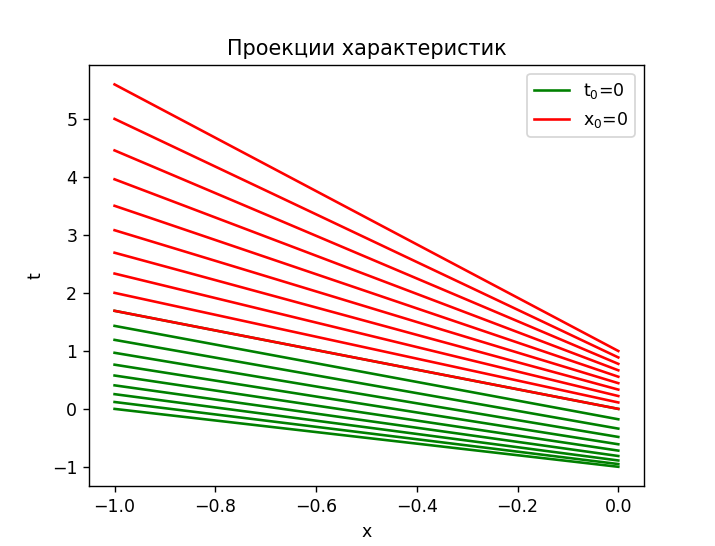

In [49]:
# по 5 линий каждого семейства
t0mesh = np.linspace(0, T, 10)
x0mesh = np.linspace(a, b, 10)

for x0 in x0mesh:
    line_t, = plt.plot(x, ch1(x, x0), "g-")
for t0 in t0mesh:
    line_x, = plt.plot(x, ch2(x, t0), "r-")
plt.title("Проекции характеристик")
plt.xlabel("x")
plt.ylabel("t")
plt.legend((line_t, line_x), ("t$_{0}$=0", "x$_{0}$=0"))

Характеристики не пересекаются, значит разрывов не будет. Этого следовало ожидать, ведь НУ и ГУ строго монотонны, согласованы и непрерывны.

# Численное решение
Приведем уравнение к дивергентному виду:
$$
\frac{\partial u}{\partial t} - \frac{\partial}{\partial x}(\frac{u^2}{2}) = 0, -1 \leqslant x < 0
$$

Будем использовать неявный трехточечный шаблон. Он безусловно устойчив для случая отрицательной скорости переноса. Аппроксимирует схему с первым порядком точности.

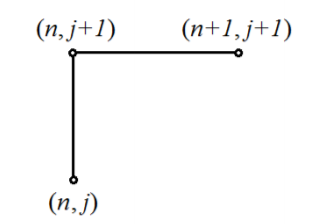